In [1]:
from rslaser import cavity
import matplotlib.pyplot as plt
import numpy as np


L_cav = 8 #Length of cavity [m]
df = 1 #Focal length difference from confocal case [m]
dfR = df
dfL = df
f=L_cav/4+df #focal length

lens_left_focal_length = f
lens_right_focal_length = f

#Crystal parameters
L_cryst = 4
n0=1
n2=0.0

drift_right_length=L_cav/2-L_cryst/2
drift_left_length=drift_right_length

wavefrontEnergy = 1.55 #Wavefront Energy [eV]. 1.55 eV is 800 nm wavelength
lam = 1239.8*1e-9/wavefrontEnergy # convert energy [eV] to wavelength [m]
print("lam=",lam)

L_eff = L_cav+(1/n0 - 1)*L_cryst #Define effective length as path length reduced by index of refraction n0
print("L_eff=",L_eff)
beta0 = np.sqrt(L_eff*f-L_eff**2/4)
print("beta0=",beta0)
sigx0 = np.sqrt(lam*beta0/4/np.pi)
print("sigx0=",sigx0)
sigrW = sigx0

#laser pulse parameters
nslice=10
sig_s=0.1 #rms length of Gaussian laser pulse [m]

lam= 7.998709677419354e-07
L_eff= 8.0
beta0= 2.8284271247461903
sigx0= 0.00042430439635904045


In [2]:
#create laser cavity
lc = cavity.LaserCavity(nslice=10,L_half_cryst=L_cryst/2, drift_right_length=drift_right_length,drift_left_length=drift_left_length, lens_left_focal_length=lens_left_focal_length, lens_right_focal_length=lens_right_focal_length,n0=n0,n2=n2,sigrW=sigx0)

#output initial parameters
(lpsxvals,lpsyvals,svals) = lc.laser_pulse.rmsvals()
plt.plot(svals,lpsyvals)
plt.show()

(ivals,svals) = lc.laser_pulse.intensity_vals()
plt.plot(svals,ivals)
plt.show()

NameError: name 'SRWLOptD' is not defined

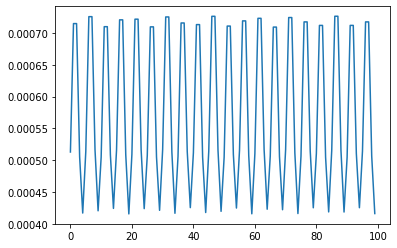

In [22]:
(sxvals,syvals) = lc.propagate(num_cycles=10)

fig, ax = plt.subplots()
ax.plot(sxvals)
plt.show()

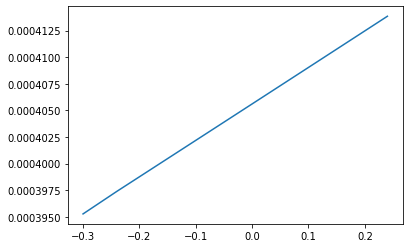

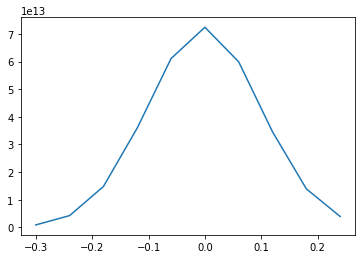

In [4]:
#output initial parameters
(lpsxvals,lpsyvals,svals) = lc.laser_pulse.rmsvals()
plt.plot(svals,lpsyvals)
plt.show()

(ivals,svals) = lc.laser_pulse.intensity_vals()
plt.plot(svals,ivals)
plt.show()